# Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

# Loading the processed data 

### Since this data is processed, it is a lot easier to interpret as the number of inconsistent, missing and invalid values are extremely minimized with the redundant and collinear factors dropped out.

In [2]:
data=pd.read_csv('processed_data.csv')

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,Make,Ex-Showroom_Price,Displacement,Cylinders,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,...,Handbrake,Instrument_Console,Third_Row_AC_Vents,Ventilation_System,Airbags,Number_of_Airbags,Parking_Assistance,Seat_Height_Adjustment,Length_new,Average_Mileage
0,0,0,Tata,292667.0,624.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,Manual,Analog + Digital,Not Applicable,Manual Air conditioning with cooling and heating,"Driver frontal airbag, Front passenger frontal...",3.80752,Rear sensors,Manual Adjustment,2697.0,23.600000
1,1,1,Tata,236447.0,624.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,Manual,Analog + Digital,Not Applicable,Fully automatic climate control,"Driver frontal airbag, Front passenger frontal...",3.80752,Rear sensors,Manual Adjustment,2697.0,23.600000
2,2,2,Tata,296661.0,624.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,Manual,Analog + Digital,Not Applicable,Air Conditioning with cooling only,"Driver frontal airbag, Front passenger frontal...",3.80752,Rear sensors,Manual Adjustment,2697.0,43.919126
3,3,3,Tata,334768.0,624.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,Manual,Analog + Digital,Not Applicable,Manual Air conditioning with cooling and heating,"Driver frontal airbag, Front passenger frontal...",3.80752,Rear sensors,Manual Adjustment,2697.0,22.750000
4,4,4,Tata,272223.0,624.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",...,Manual,Analog + Digital,Not Applicable,Air Conditioning with cooling only,"Driver frontal airbag, Front passenger frontal...",3.80752,Rear sensors,Manual Adjustment,2697.0,23.600000


In [4]:
data.isnull().sum(axis=0)

Unnamed: 0                0
Unnamed: 0.1              0
Make                      0
Ex-Showroom_Price         0
Displacement              0
Cylinders                 0
Drivetrain                0
Cylinder_Configuration    0
Emission_Norm             0
Engine_Location           0
Fuel_System               0
Fuel_Tank_Capacity        0
Fuel_Type                 0
Width                     0
Body_Type                 0
Kerb_Weight               0
Gears                     0
Front_Brakes              0
Rear_Brakes               0
Front_Suspension          0
Rear_Suspension           0
Front_Tyre_&_Rim          0
Rear_Tyre_&_Rim           0
Power_Steering            0
Power_Windows             0
Keyless_Entry             0
Power                     0
Seats_Material            0
Type                      0
12v_Power_Outlet          0
Audiosystem               0
Basic_Warranty            0
Clock                     0
Fuel-lid_Opener           0
Handbrake                 0
Instrument_Console  

### Generating the heatmap to check the collinearity existing between the different numerical predictors.

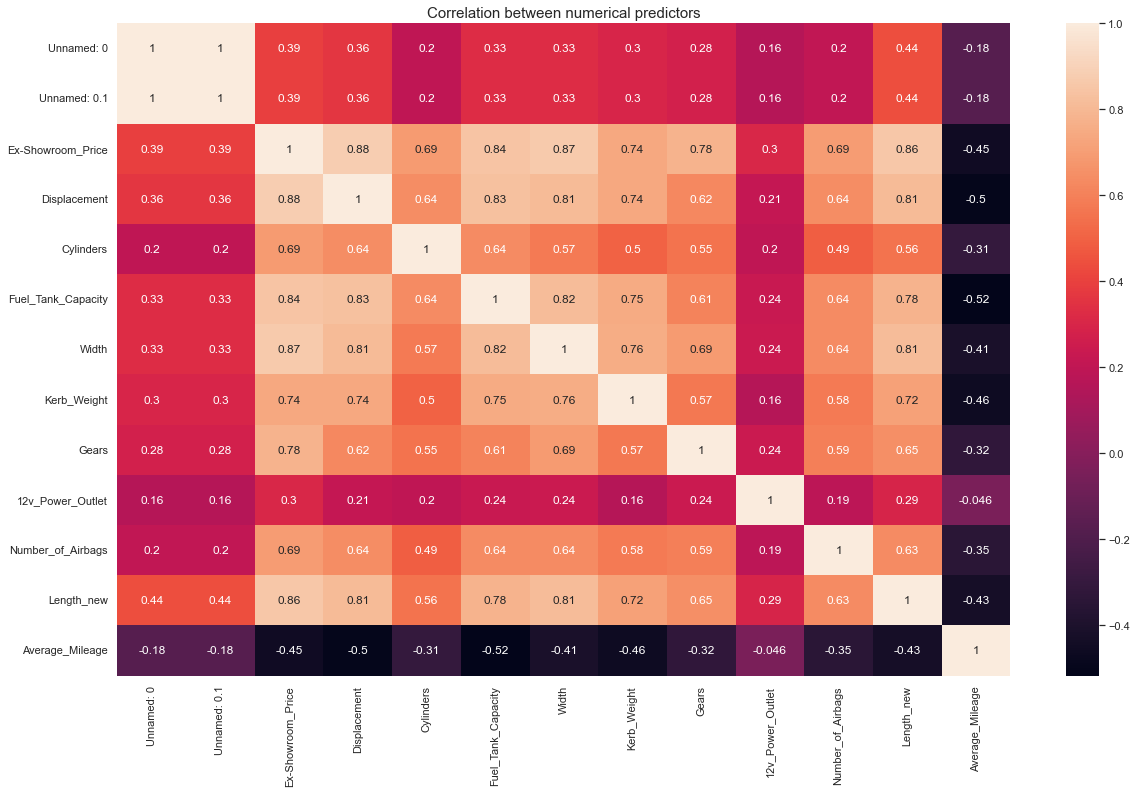

In [5]:
plt.figure(figsize=(20,12))

plt.title('Correlation between numerical predictors',fontsize=15)
sns.heatmap(data=data.corr(method='spearman'),annot=True)       
plt.show()

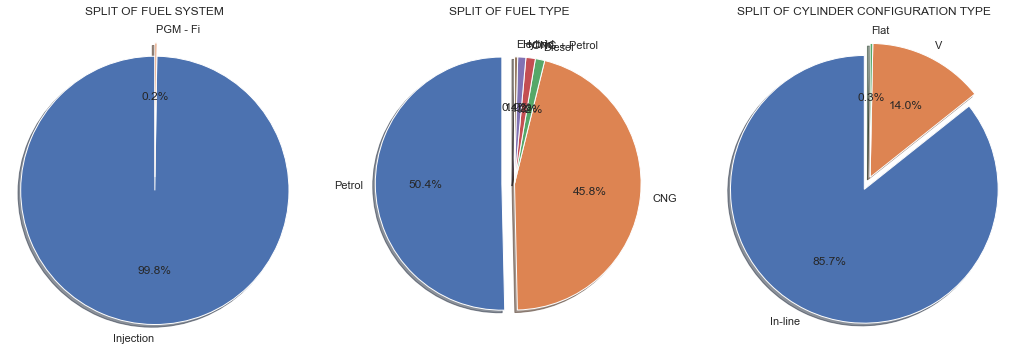

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(18,6))
explode = (0.1, 0.1)  

pie_labels_f = ['Injection', 'PGM - Fi']
pie_sizes_f = data['Fuel_System'].value_counts()/len(data.index) * 100
explode = (0.1, 0)  
ax1.pie(pie_sizes_f, labels=pie_labels_f, explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title('SPLIT OF FUEL SYSTEM')

pie_labels_a = data.Fuel_Type.unique()
pie_sizes_a = data['Fuel_Type'].value_counts()/len(data.index) * 100
explode = (0.1,0,0,0,0, 0)  
ax2.pie(pie_sizes_a, labels=pie_labels_a, explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.axis('equal')  
ax2.set_title('SPLIT OF FUEL TYPE')

pie_labels_e = data.Cylinder_Configuration.unique()
pie_sizes_e = data['Cylinder_Configuration'].value_counts()/len(data.index) * 100
explode = (0.1, 0,0)  
ax3.pie(pie_sizes_e, labels=pie_labels_e, explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)
ax3.axis('equal')
ax3.set_title('SPLIT OF CYLINDER CONFIGURATION TYPE')

plt.show()


#### From the above three pie charts it can be clearly observed that 'Injection' fuel system and 'In-line' cylinder comfiguration is the most preferred features among customer segments.

## Favourite brand of customers as deduced from the dataset

<AxesSubplot:>

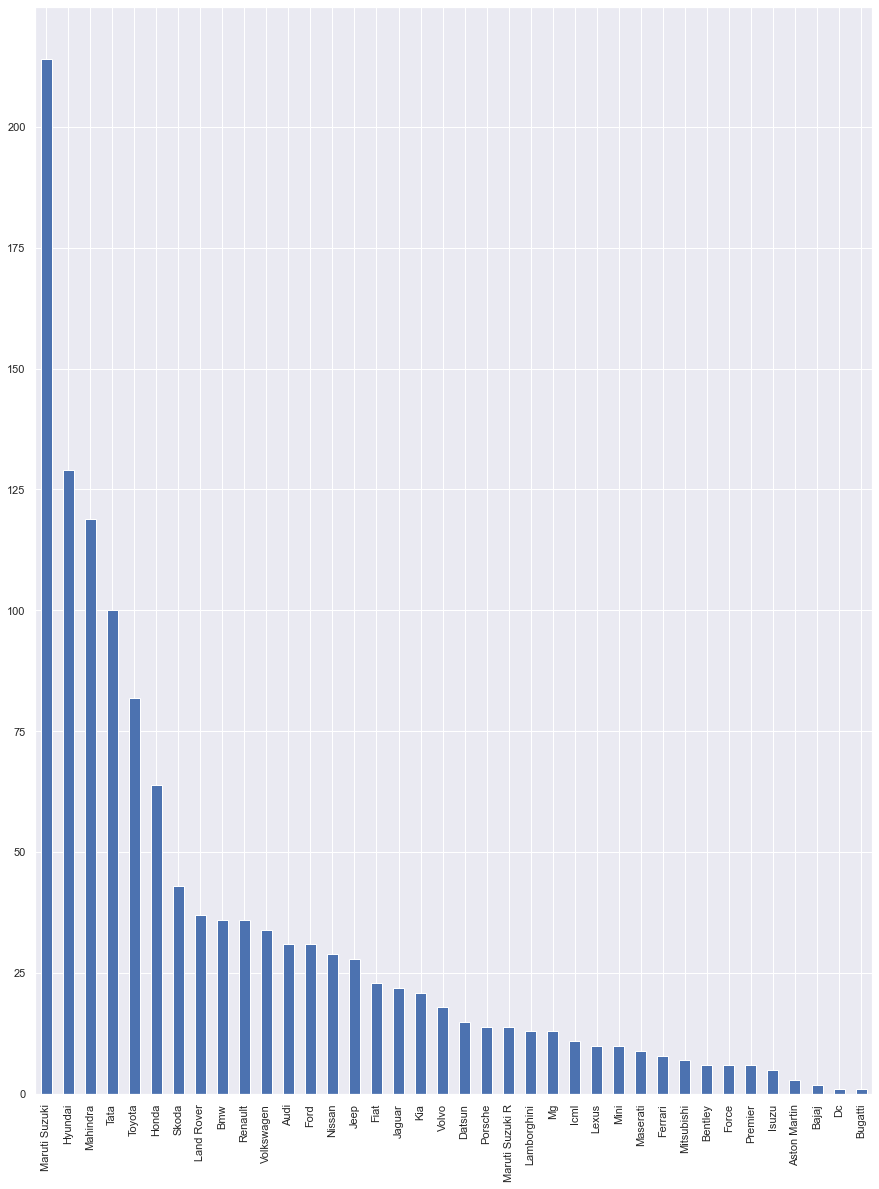

In [7]:
data['Make'].value_counts().plot(kind='bar', figsize=(15,20))

##### From the above bar graph it is clear that the brand name 'Maruti Suzuki' has attracted the most number of customers.

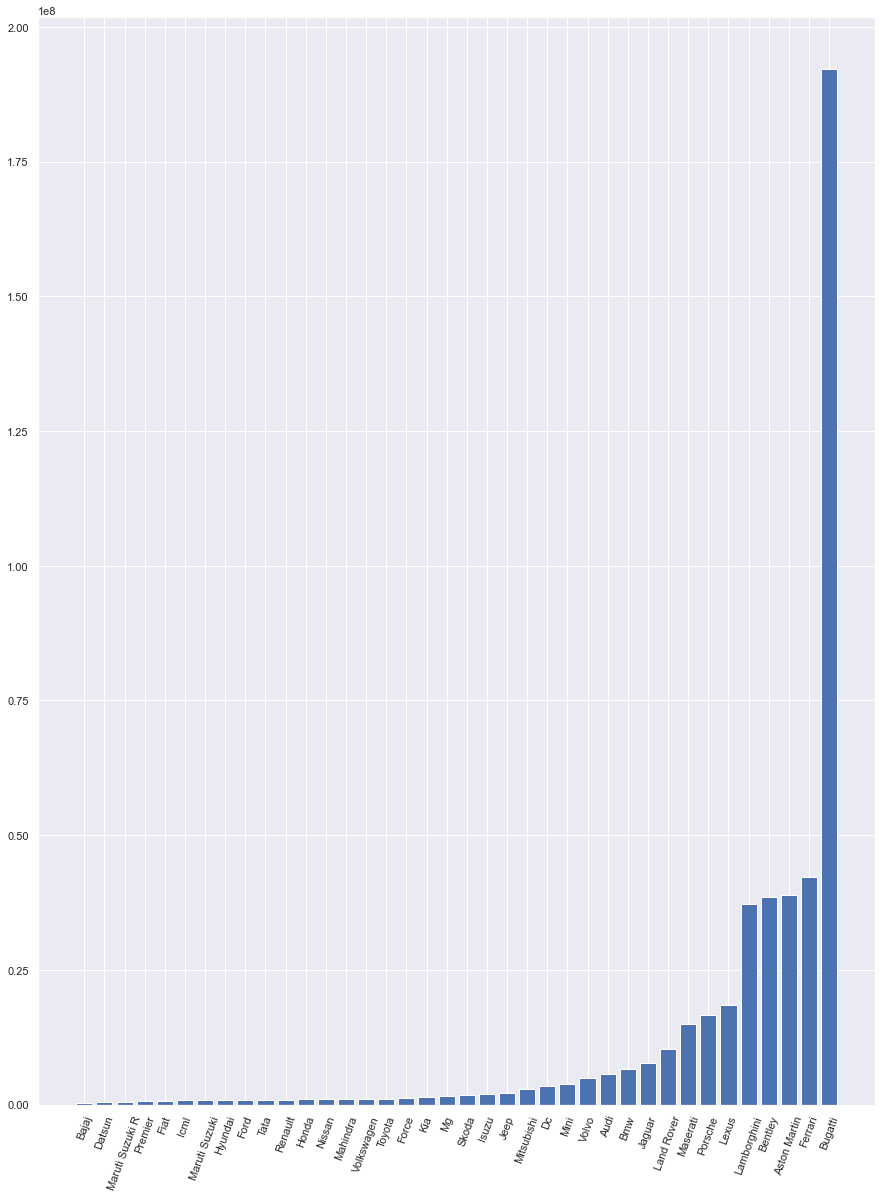

In [8]:
b= data.groupby(['Make']).median().sort_values("Ex-Showroom_Price")
plt.figure(figsize=(15,20))
plt.bar(b.index,b['Ex-Showroom_Price'])
plt.xticks(rotation=70)
plt.show()

# Analysis on customer segments
### There is a major segment of customers who prefer buying cars lying on the lower middle axis of the price comparision. These brands basically include Maruti Suzuki, Toyota etc. There are car brands like Bajaj which despite offering the lowest price ranges, doesn't attract much customers and the same goes for extremely pricey cars like Bugatti. The cars present slightly over the median prices like Audi also attracts a good number of customers.

### This proves that in this market there are mostly middle income buyers which the companies can target for maximising profit. Also secondly there are good number of upper middle class and some percentage of rich people going for really expensive cars. The lower income group isn't much active in this scenario as evident from the fact that the lowest price range cars are attracting very less customers.

##### The bars towards the extreme right side shows the brand names of the most expensive cars in the market.

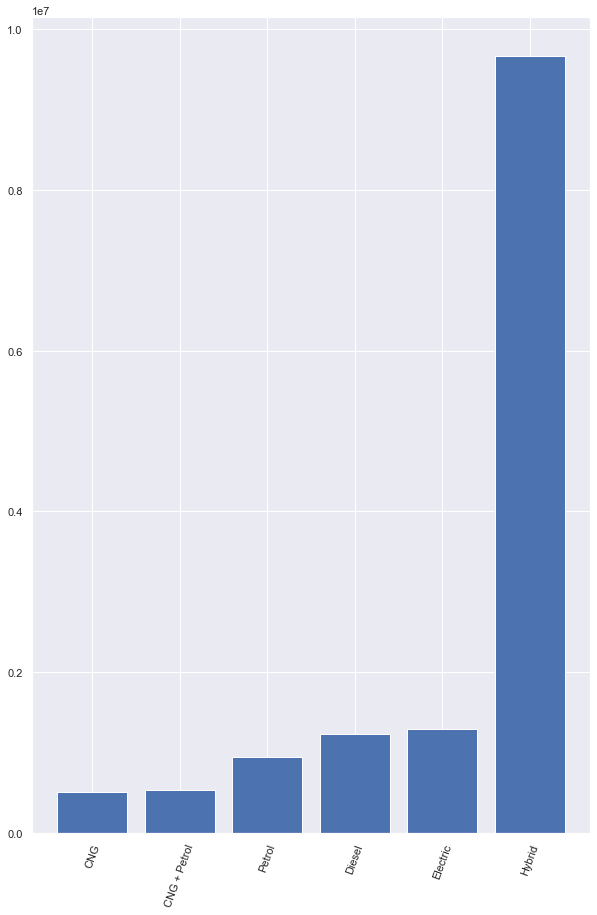

In [9]:
b= data.groupby(['Fuel_Type']).median().sort_values("Ex-Showroom_Price")
plt.figure(figsize=(10,15))
plt.bar(b.index,b['Ex-Showroom_Price'])
plt.xticks(rotation=70)
plt.show()

##### As evident from this graph, the hybrid fuel type cars are amongst the costliest cars in the market and this is exactly what the general market trent shows.

## Plotting body types of cars against their frequency to find the most preferred car body type

<AxesSubplot:>

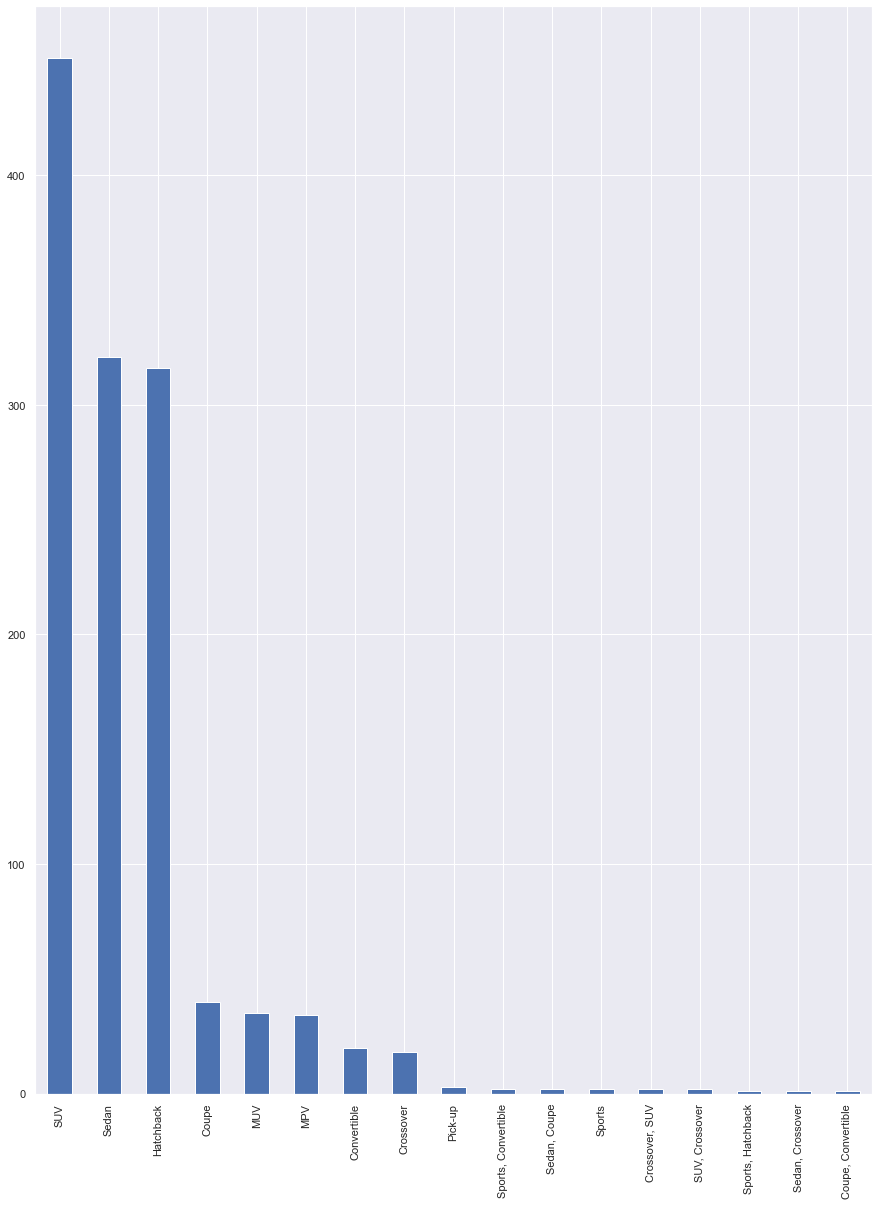

In [10]:
data['Body_Type'].value_counts().plot(kind='bar', figsize=(15,20))

##### From the above relation it is clear that the most preferred car body types are the SUV and Sedan in the market. This implies that the car making companies can specifically target these models so as to avoid redundant car models being brought into the market as well as maximise sales my matching the customer demands.

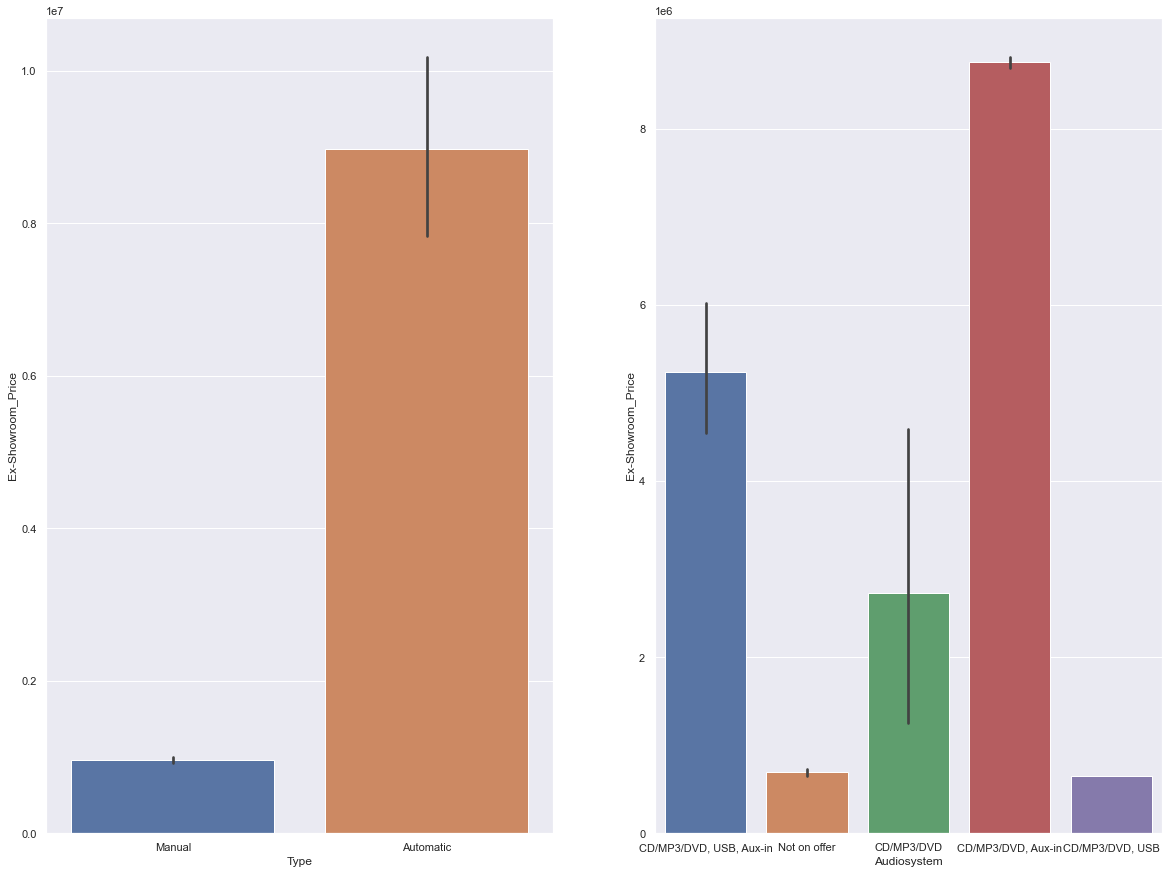

In [17]:
plt.figure(figsize=(20,15))

plt.subplot(1, 2, 1)
sns.barplot(x='Type',y='Ex-Showroom_Price',data=data)

plt.subplot(1, 2, 2)
sns.barplot(x='Audiosystem',y='Ex-Showroom_Price',data=data)

plt.show()

##### Above graphs shows the dependency of the price factor on features like audio system and the type of the car. As evident, automatic cars are way more expensive than the manual ones.

## Exploring the dependencies of price on various categorical variables with the help of boxplots

<AxesSubplot:xlabel='Keyless_Entry', ylabel='Ex-Showroom_Price'>

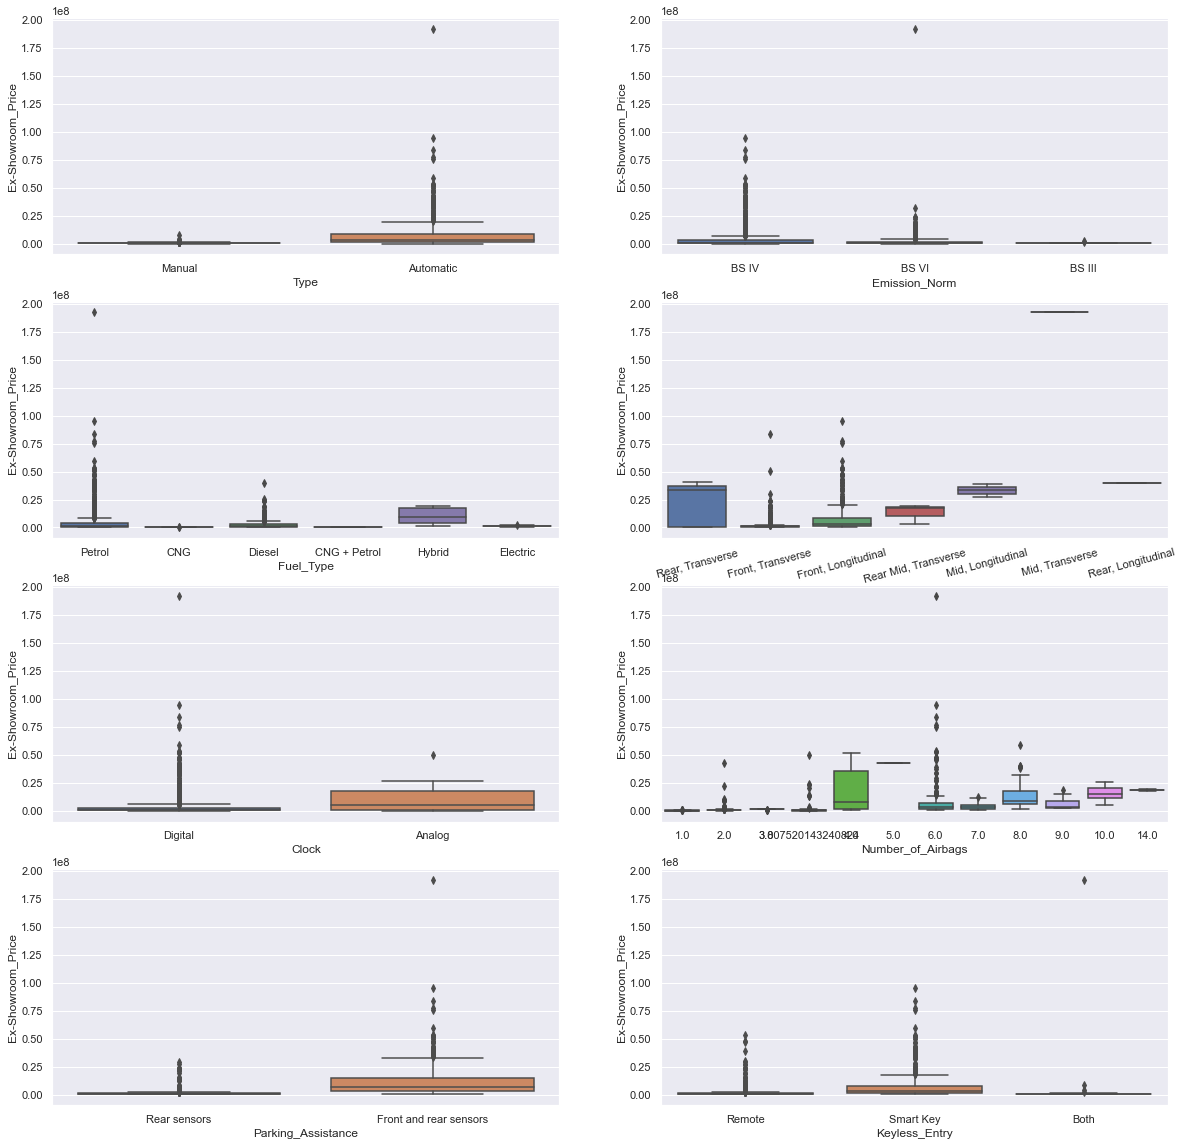

In [30]:
plt.figure(figsize=(20,20))
plt.subplot(4, 2, 1)
sns.boxplot(x='Type',y='Ex-Showroom_Price',data=data)

plt.subplot(4, 2, 2)
sns.boxplot(x='Emission_Norm',y='Ex-Showroom_Price',data=data)

plt.subplot(4, 2, 3)
sns.boxplot(x='Fuel_Type',y='Ex-Showroom_Price',data=data)

plt.subplot(4, 2, 4)
sns.boxplot(x='Engine_Location',y='Ex-Showroom_Price',data=data)
plt.xticks(rotation=15)

plt.subplot(4, 2, 5)
sns.boxplot(x='Clock',y='Ex-Showroom_Price',data=data)

plt.subplot(4, 2, 6)
sns.boxplot(x='Number_of_Airbags',y='Ex-Showroom_Price',data=data)

plt.subplot(4, 2, 7)
sns.boxplot(x='Parking_Assistance',y='Ex-Showroom_Price',data=data)

plt.subplot(4, 2, 8)
sns.boxplot(x='Keyless_Entry',y='Ex-Showroom_Price',data=data)


## Does the average mileage offered by a car depend on the fuel type it uses?

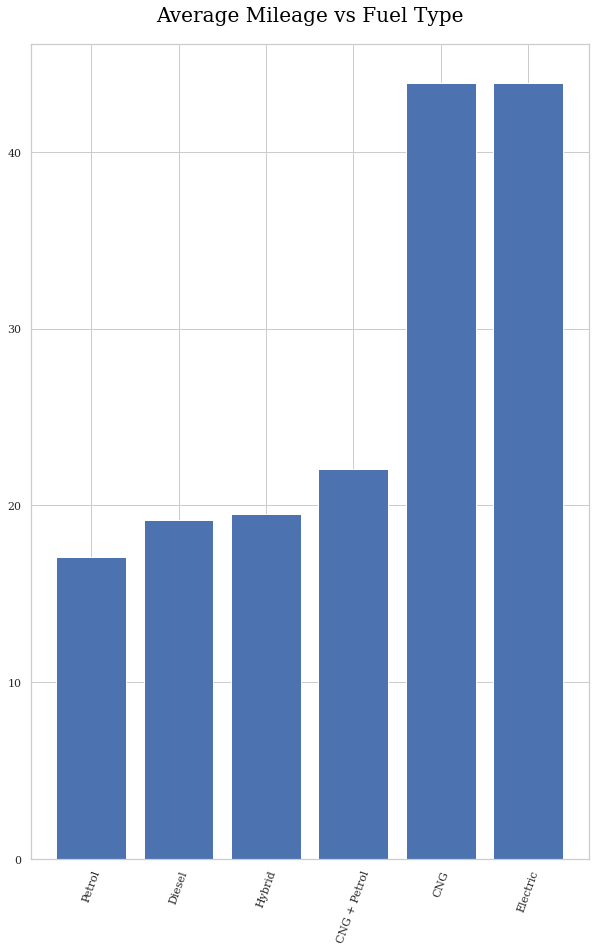

In [43]:
b= data.groupby(['Fuel_Type']).median().sort_values("Average_Mileage")
plt.figure(figsize=(10,15))
plt.bar(b.index,b['Average_Mileage'])
plt.xticks(rotation=70)
plt.title("Average Mileage vs Fuel Type", fontsize=20, y=1.02, color='black')
plt.show()

### From the above graph it is clear that the Electric Cars outperform all other types of fuel engines and gives the best performance among all. Analysis of such types gives deep insights into trend existing in the market between quality and price. This can help in making future plans as well as designing new cars while keeping in mind the balance required between sophisticated features and the general buying range of the customers.

## Does the average mileage offered by the car depend on the number of cylinders present?

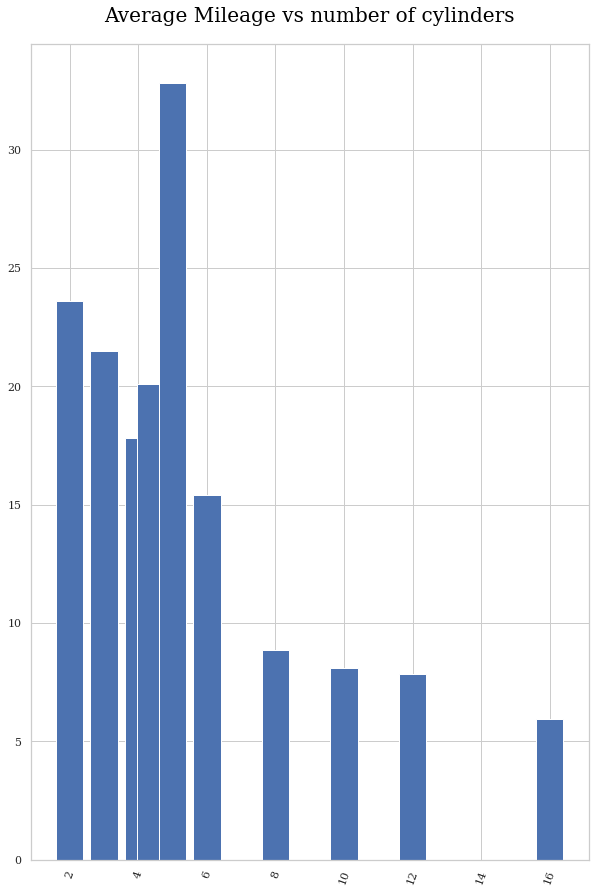

In [42]:
b= data.groupby(['Cylinders']).median().sort_values("Average_Mileage")
plt.figure(figsize=(10,15))
plt.bar(b.index,b['Average_Mileage'])
plt.xticks(rotation=70)
plt.title("Average Mileage vs number of cylinders", fontsize=20, y=1.02, color='black')
plt.show()

##### As evident from the graph, average mileage offered by the car reduces with increase in number of cylinders. The maximum performance is achieved at around 4 to 5 cylinders.

In [35]:
data.dtypes

Unnamed: 0                  int64
Unnamed: 0.1                int64
Make                       object
Ex-Showroom_Price         float64
Displacement              float64
Cylinders                 float64
Drivetrain                 object
Cylinder_Configuration     object
Emission_Norm              object
Engine_Location            object
Fuel_System                object
Fuel_Tank_Capacity        float64
Fuel_Type                  object
Width                     float64
Body_Type                  object
Kerb_Weight               float64
Gears                     float64
Front_Brakes               object
Rear_Brakes                object
Front_Suspension           object
Rear_Suspension            object
Front_Tyre_&_Rim           object
Rear_Tyre_&_Rim            object
Power_Steering             object
Power_Windows              object
Keyless_Entry              object
Power                      object
Seats_Material             object
Type                       object
12v_Power_Outl

## Is there any realtionship between displacement and number of cylinders present in the car?

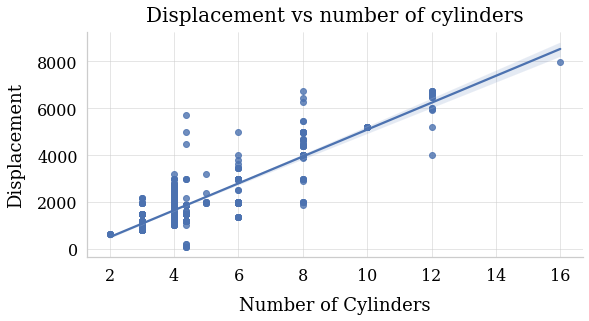

In [37]:
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Old Standard TT'})
sns.lmplot(y='Displacement', x='Cylinders', data=data, size=4, aspect=2)
plt.xticks(fontsize=16, rotation=360, color='black')
plt.yticks(fontsize=16, color='black')
plt.ylabel("Displacement", fontsize=18, labelpad=12, color='black')
plt.xlabel("Number of Cylinders", fontsize=18, labelpad=12, color='black')
plt.title("Displacement vs number of cylinders", fontsize=20, y=1.02, color='black')
plt.grid(linewidth=0.5)
plt.show();

##### As can be clearly deduced from the graph, the displacement is linearly dependant on the number of cylinders, i.e., more the number of cylinders, more is the displacement. 

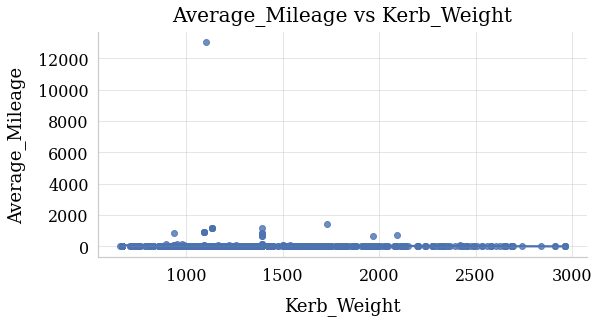

In [39]:
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Old Standard TT'})
sns.lmplot(y='Average_Mileage', x='Kerb_Weight', data=data, size=4, aspect=2)
plt.xticks(fontsize=16, rotation=360, color='black')
plt.yticks(fontsize=16, color='black')
plt.ylabel("Average_Mileage", fontsize=18, labelpad=12, color='black')
plt.xlabel("Kerb_Weight", fontsize=18, labelpad=12, color='black')
plt.title("Average_Mileage vs Kerb_Weight", fontsize=20, y=1.02, color='black')
plt.grid(linewidth=0.5)
plt.show();

##### As expected kerb weight doesn't affect the average mileage, the only factor known to be affected by kerb weight is rate of acceleration. i.e., Lesser the kerb weight, faster is the acceleration and this is very well proved by this plot.  

## How does length bring about variation in car prices?

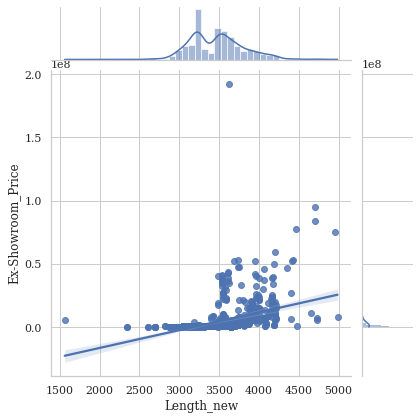

In [44]:
sns.jointplot(x='Length_new',y='Ex-Showroom_Price',data=data,kind='reg')

## How number of cylinders present affects the price parameter?

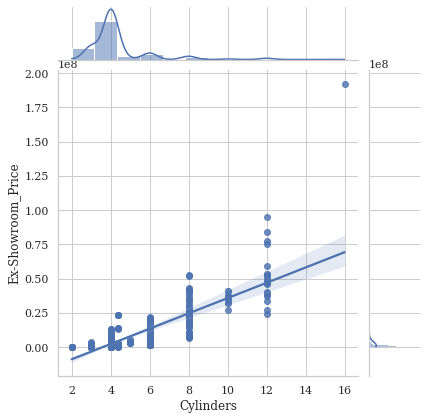

In [45]:
sns.jointplot(x='Cylinders',y='Ex-Showroom_Price',data=data,kind='reg')

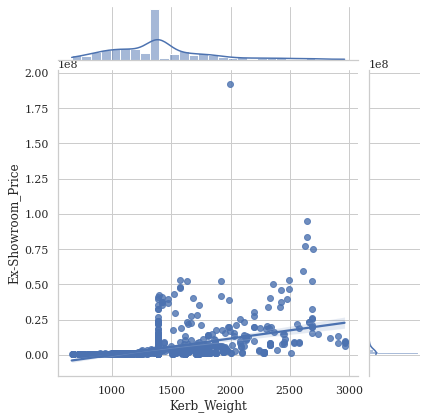

In [46]:
sns.jointplot(x='Kerb_Weight',y='Ex-Showroom_Price',data=data,kind='reg')

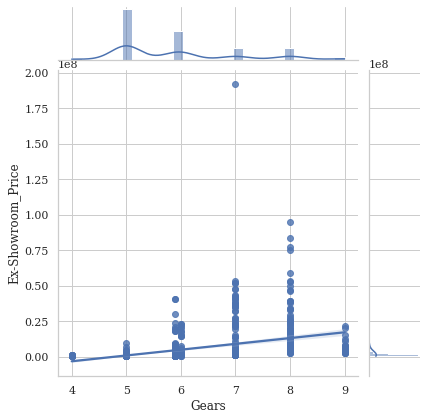

In [48]:
sns.jointplot(x='Gears',y='Ex-Showroom_Price',data=data,kind='reg')

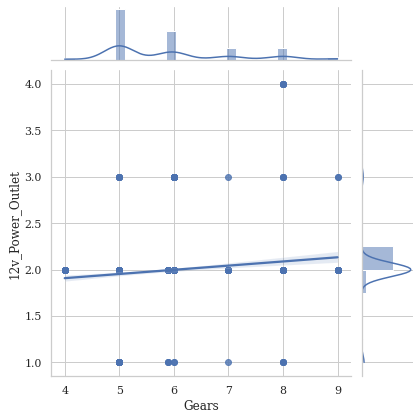

In [49]:
sns.jointplot(x='Gears',y='12v_Power_Outlet',data=data,kind='reg')

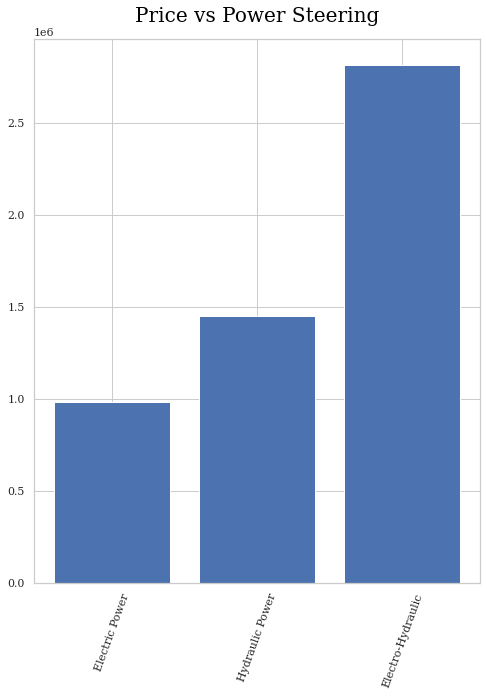

In [51]:
b= data.groupby(['Power_Steering']).median().sort_values("Ex-Showroom_Price")
plt.figure(figsize=(8,10))
plt.bar(b.index,b['Ex-Showroom_Price'])
plt.xticks(rotation=70)
plt.title("Price vs Power Steering", fontsize=20, y=1.02, color='black')
plt.show()

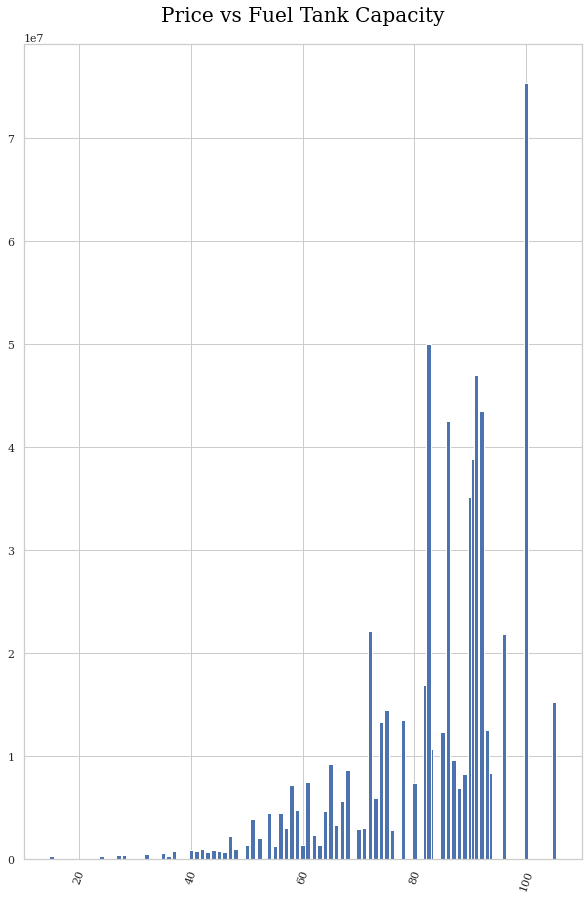

In [62]:
b= data.groupby(['Fuel_Tank_Capacity']).median().sort_values("Ex-Showroom_Price")
plt.figure(figsize=(10,15))
plt.bar(b.index,b['Ex-Showroom_Price'])
plt.xticks(rotation=70)
plt.title("Price vs Fuel Tank Capacity", fontsize=20, y=1.02, color='black')
plt.show()

### As expected the price of any car does vary with the fuel tank capacity as increased fuel tank capacity in most cases essentially means better performance per trip.

In [66]:
data['Drivetrain']=data['Drivetrain'].replace('FWD','FWD (Front Wheel Drive)')

# PIE-CHARTS

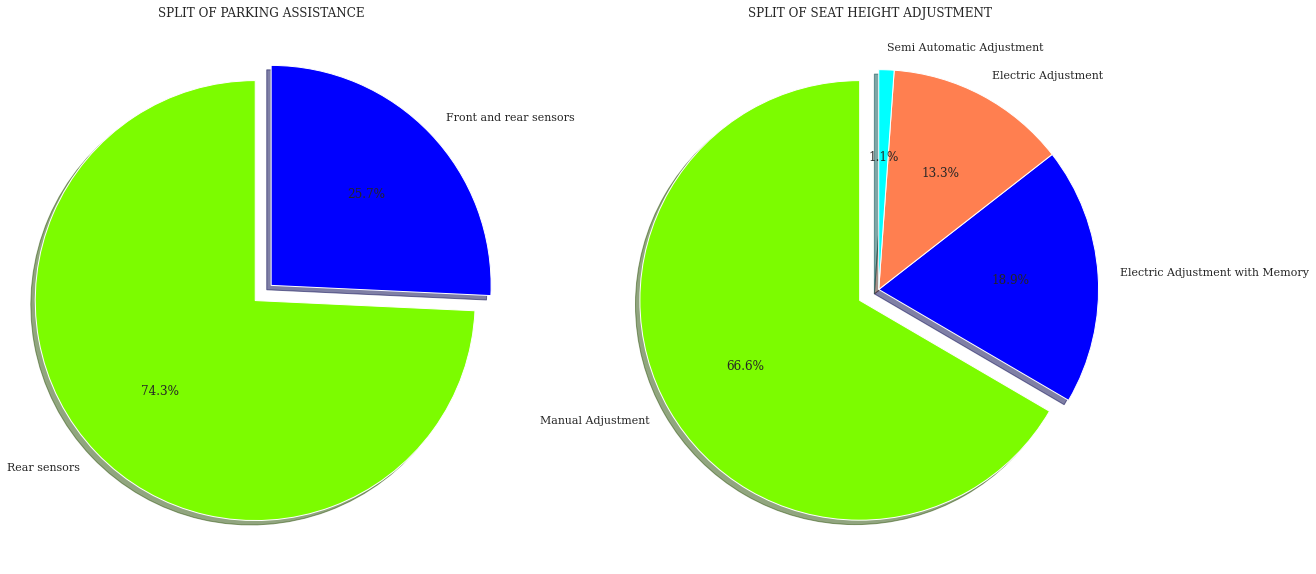

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
explode = (0.1, 0.1)  
colors = ['lawngreen', 'blue', 'coral', 'cyan']

pie_labels_f = data.Parking_Assistance.unique()
pie_sizes_f = data['Parking_Assistance'].value_counts()/len(data.index) * 100
explode = (0.1, 0)  
ax1.pie(pie_sizes_f, labels=pie_labels_f,colors=colors, explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
ax1.set_title('SPLIT OF PARKING ASSISTANCE')

pie_labels_a = data.Seat_Height_Adjustment.unique()
pie_sizes_a = data['Seat_Height_Adjustment'].value_counts()/len(data.index) * 100
explode = (0.1,0,0,0)  
ax2.pie(pie_sizes_a, labels=pie_labels_a,colors=colors, explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.axis('equal')  
ax2.set_title('SPLIT OF SEAT HEIGHT ADJUSTMENT')

plt.show()

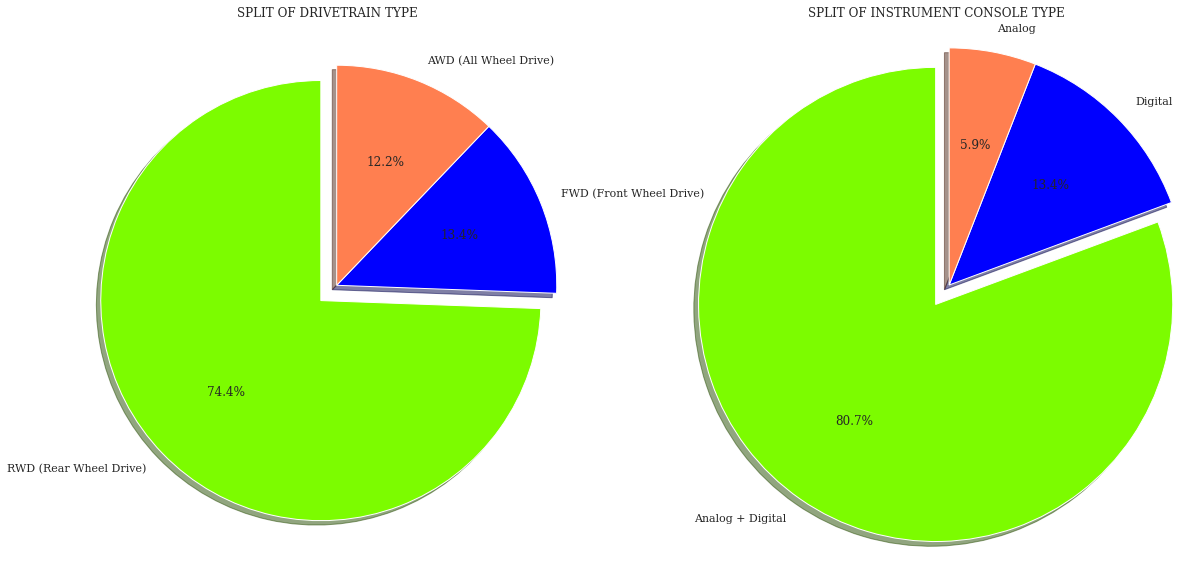

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
explode = (0.1, 0.1)  
colors = ['lawngreen', 'blue', 'coral', 'cyan']

pie_labels_e = data.Drivetrain.unique()
pie_sizes_e = data['Drivetrain'].value_counts()/len(data.index) * 100
explode = (0.1, 0,0)  
ax1.pie(pie_sizes_e, labels=pie_labels_e,colors=colors, explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('SPLIT OF DRIVETRAIN TYPE')

pie_labels_e = data.Instrument_Console.unique()
pie_sizes_e = data['Instrument_Console'].value_counts()/len(data.index) * 100
explode = (0.1, 0,0)  
ax2.pie(pie_sizes_e, labels=pie_labels_e,colors=colors, explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.axis('equal')
ax2.set_title('SPLIT OF INSTRUMENT CONSOLE TYPE')

plt.show()

## Cost vs quality scenario of drivetrain types in the market.

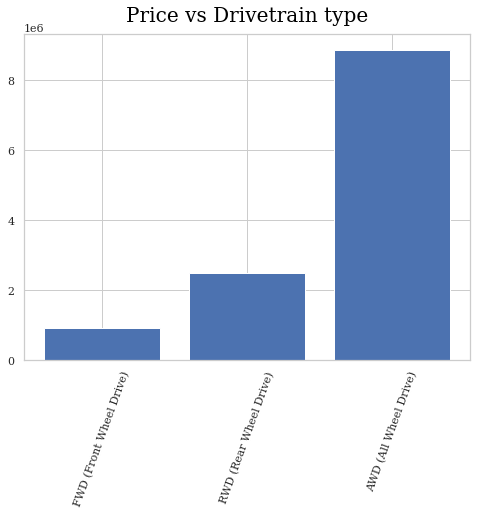

In [110]:
b= data.groupby(['Drivetrain']).median().sort_values("Ex-Showroom_Price")
plt.figure(figsize=(8,6))
plt.bar(b.index,b['Ex-Showroom_Price'])
plt.xticks(rotation=70)
plt.title("Price vs Drivetrain type", fontsize=20, y=1.02, color='black')
plt.show()

### From the pie chart it can be seen that the RWD is the most used type of drivetrain but considering the price factor it is the AWD which beats everything else. Also incorporating the general knowledge about drivetrains, it is the AWD which outperforms other types but subsequently it is a costly one.

In [77]:
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 years /40000 Kms (years/distance whichever comes first)','2 years / 40,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('3 years /100000 Kms (years/distance whichever comes first)','3 years / 100,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('3 Years/1,00,000 Kms (Whichever comes earlier)','3 years / 100,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 Years / 40,000 Kms (Whichever comes earlier)','2 years / 40,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 Years / 100,000 Kms (whichever comes first)','2 years / 100,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 years /75000 Kms (years/distance whichever comes first)','2 years / 75,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 years /1,00,000 Kms (years/distance whichever comes first)','2 years / 100,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('24 months /50000 Kms (whichever comes first)','2 years / 50,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 years /50000 Kms (years/distance whichever comes first)','2 years / 50,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 Years / 75,000 KM (whichever is earlier)','2 years / 75,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 Years / 50,000 Kms (Whichever comes earlier)','2 years / 50,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('3 Years / 100000 km (whichever comes first)','3 years / 100,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('3 years / 100,000 Km of warranty**','3 years / 100,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('3rd years /Unlimited Kms (years/distance whichever comes first)','3 years / Unlimited Kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('3 years / 100,000 Kms','3 years / 100,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('4 years /Unlimited Kms (years/distance whichever comes first)','4 years / Unlimited Kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('4 years / 80000 Kms (years/distance whichever comes first)','4 years / 80,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('3 years/1 lakh kms (whichever is earlier)','3 years / 100,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('8 yrs/1.6L kmBattery Warranty','8 years / 160,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('1 Year /Unlimited KMs','1 years / Unlimited kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('3 years/40,000 km','3 years / 40,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 Years Unlimited Kilometres','2 years / Unlimited kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('3 years 60000 kms','3 years / 60,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 years without mileage limit','2 years / Unlimited kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('3 Years Warranty','3 years / 100,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 Years Warranty','3 years / 40,000 kms')
data['Basic_Warranty']=data['Basic_Warranty'].replace('2 years / Unlimited Kms','2 years / Unlimited kms')

## What is the most general basic warranty provided in the cars?

<AxesSubplot:>

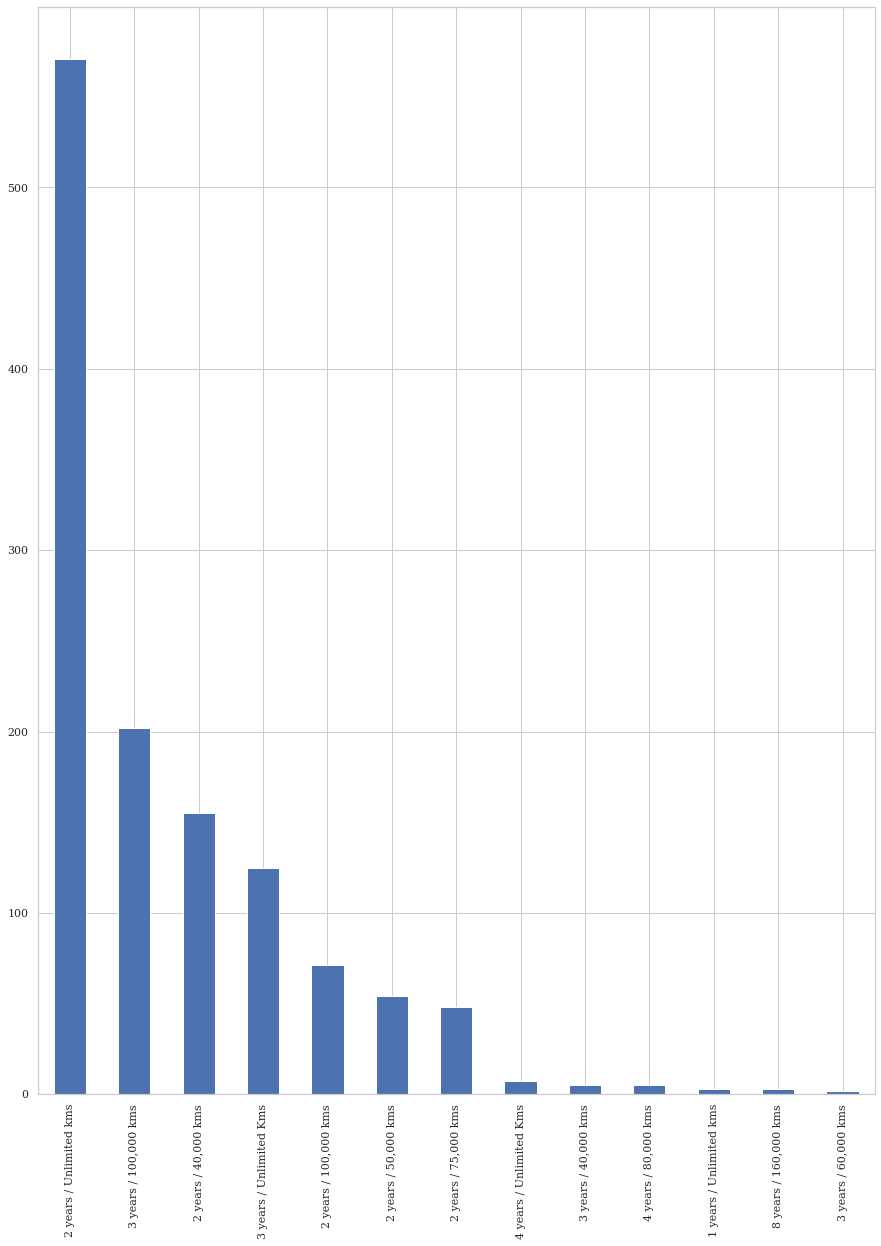

In [84]:
data['Basic_Warranty'].value_counts().plot(kind='bar', figsize=(15,20))

## Relationship of basic warranty with price

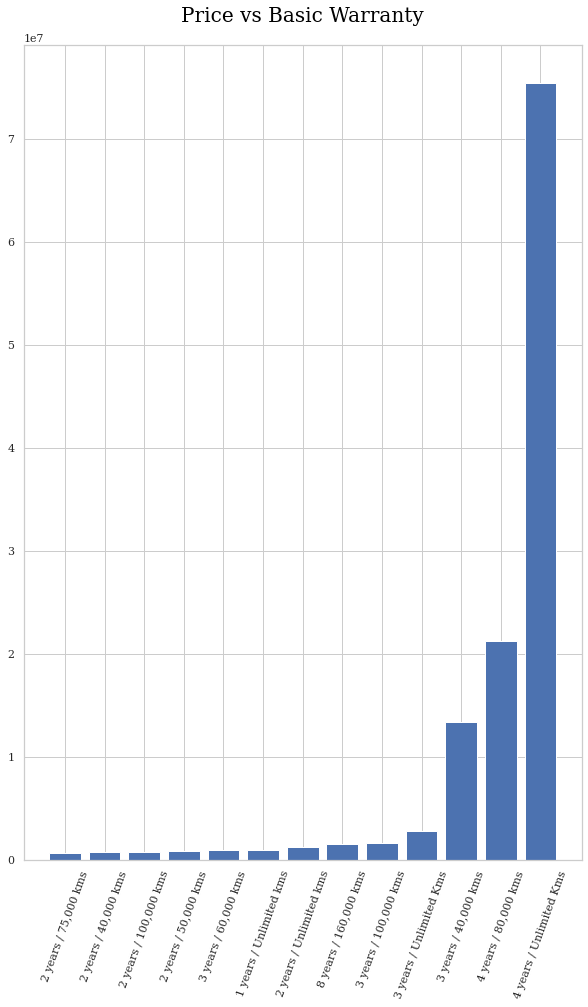

In [85]:
b= data.groupby(['Basic_Warranty']).median().sort_values("Ex-Showroom_Price")
plt.figure(figsize=(10,15))
plt.bar(b.index,b['Ex-Showroom_Price'])
plt.xticks(rotation=70)
plt.title("Price vs Basic Warranty", fontsize=20, y=1.02, color='black')
plt.show()

### As can be clearly seen from the graph plot, more the amount of warranty, more expensive the car is. This is also true considering the market scenario because more warranty period implies better quality manufacturing with top notch facilities so as to ensure longevity.

In [100]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Make', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Drivetrain', 'Cylinder_Configuration',
       'Emission_Norm', 'Engine_Location', 'Fuel_System', 'Fuel_Tank_Capacity',
       'Fuel_Type', 'Width', 'Body_Type', 'Kerb_Weight', 'Gears',
       'Front_Brakes', 'Rear_Brakes', 'Front_Suspension', 'Rear_Suspension',
       'Front_Tyre_&_Rim', 'Rear_Tyre_&_Rim', 'Power_Steering',
       'Power_Windows', 'Keyless_Entry', 'Power', 'Seats_Material', 'Type',
       '12v_Power_Outlet', 'Audiosystem', 'Basic_Warranty', 'Clock',
       'Fuel-lid_Opener', 'Handbrake', 'Instrument_Console',
       'Third_Row_AC_Vents', 'Ventilation_System', 'Airbags',
       'Number_of_Airbags', 'Parking_Assistance', 'Seat_Height_Adjustment',
       'Length_new', 'Average_Mileage'],
      dtype='object')

## Relation between number of gears and Kerb Weight of cars

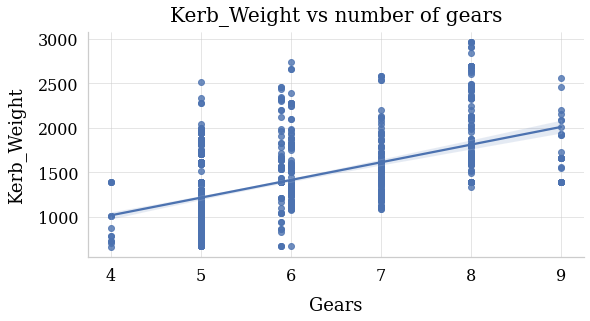

In [104]:
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Old Standard TT'})
sns.lmplot(y='Kerb_Weight', x='Gears', data=data, size=4, aspect=2)
plt.xticks(fontsize=16, rotation=360, color='black')
plt.yticks(fontsize=16, color='black')
plt.ylabel("Kerb_Weight", fontsize=18, labelpad=12, color='black')
plt.xlabel("Gears", fontsize=18, labelpad=12, color='black')
plt.title("Kerb_Weight vs number of gears", fontsize=20, y=1.02, color='black')
plt.grid(linewidth=0.5)
plt.show();

### The Kerb Weight of the car shows direct linear relationship with the number of gears.

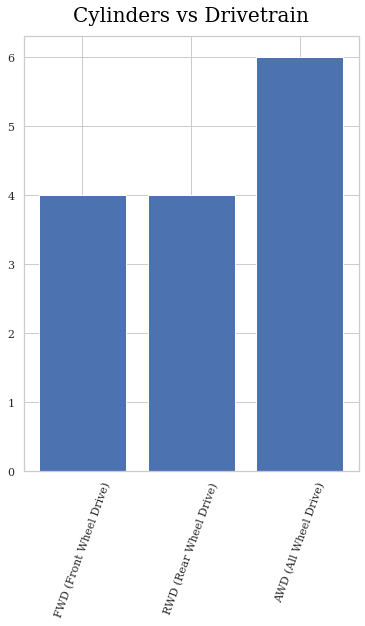

In [108]:
b= data.groupby(['Drivetrain']).median().sort_values("Cylinders")
plt.figure(figsize=(6,8))
plt.bar(b.index,b['Cylinders'])
plt.xticks(rotation=70)
plt.title("Cylinders vs Drivetrain", fontsize=20, y=1.02, color='black')
plt.show()

## All these insights can thus be very helpful while studying the patterns existing in the market and the demand of customers and thus can help the companies take decisions which will help them satisfy customer demands better as well as plan accordingly for the betterment of their brand in terms of business perspective.